# **PROJECT MACHINE LEARNING**

## **Customer Segmentation Using K-Means and RFM to Optimize E-Commerce Marketing Strategies**

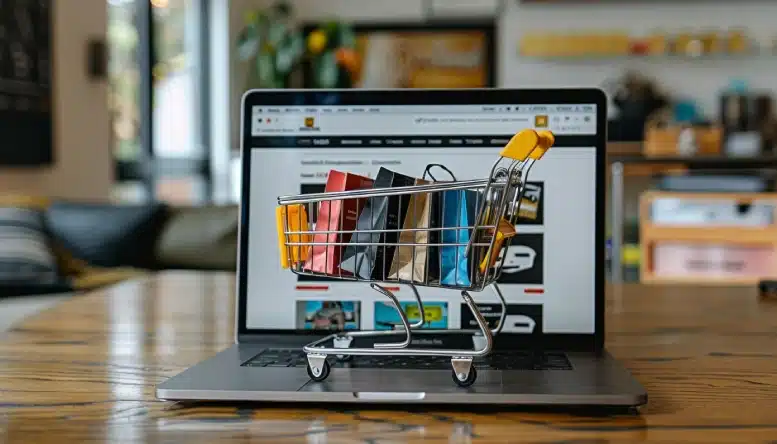

# **Introduction Team**

- Bintang Ary Pradana (2210631170060)
- Dandy Febryan Adham (2210631170061)

# 0. Import Module/Package

In [36]:
pip install yellowbrick

In [37]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Model
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from yellowbrick.cluster import KElbowVisualizer

# 1. Business Understanding

## 1.1. Background

Industri *e-commerce* di Amerika Serikat berkembang pesat didorong oleh perubahan perilaku konsumen dan kemajuan teknologi digital. Persaingan yang semakin ketat menuntut perusahaan untuk menarik dan mempertahankan pelanggan melalui strategi pemasaran yang lebih personal dan berbasis data.

Namun, masih banyak perusahaan menghadapi kesulitan dalam memahami pola belanja pelanggan secara akurat. Tanpa analisis yang tepat, strategi pemasaran cenderung bersifat generalisasi, sehingga kurang efektif dalam meningkatkan retensi pelanggan dan mengoptimalkan alokasi anggaran pemasaran.

## 1.2. Main Problem

**1. Strategi Pemasaran yang Kurang Tepat Sasaran**\
Banyak perusahaan masih menggunakan pendekatan pemasaran konvesional tanpa mempertimbangkan perbedaan perilaku pelanggan. Akibatnya, kampanye pemasaran menjadi kurang efektif, biaya promosi meningkat, dan tingkat konversi pelanggan rendah.

**2. Kesulitan dalam Identifikasi dan Retensi Pelanggan Bernilai Tinggi**\
Tidak semua pelanggan memberikan kontribusi yang sama terhadap pendapatan perusahaan. Tanpa segmentasi yang jelas, perusahaan kesulitan mengenali pelanggan yang sering berbelanja (loyal) dan pelanggan dengan potensi nilai transaksi tinggi. Hal ini berdampak pada rendahnya efektivitas program retensi pelanggan dan meningkatnya churn rate.

**3. Kurangnya Pemanfaatan Data dalam Segmentasi Pelanggan**\
Meskipun perusahaan memiliki banyak data transaksi pelanggan, data ini sering kali tidak dianalisis secara mendalam. Keputusan pemasaran masih didasarkan pada intuisi atau metode segmentasi tradisional yang kurang akurat. Akibatnya, peluang untuk meningkatkan penjualan dan loyalitas pelanggan menjadi tidak optimal.

## 1.3. Solusi

Untuk mengatasi masalah tersebut, **RFM Analysis** dapat digunakan untuk mengevaluasi nilai pelanggan berdasarkan pola transaksi, kemudian dikombinasikan dengan **K-Means Clustering** untuk menghasilkan segmentasi pelanggan yang lebih akurat.

Melalui pendekatan ini, perusahaan *e-commerce* di Amerika Serikat dapat:
- Mengidentifikasi kelompok pelanggan sesuai dengan karakteristiknya masing-masing.
- Menyusun strategi pemasaran yang lebih terarah dan berbasis data sesuai dengan segmen.
- Meningkatkan loyalitas pelanggan dengan pendekatan yang lebih personal.

## 1.4. Limitation

Meskipun dataset yang digunakan mencakup berbagai variabel yang dapat digunakan untuk analisis, terdapat beberapa keterbatasan yang perlu diperhatikan:

- **Keterbatasan dalam informasi demografis pelanggan**, karena hanya terdapat variabel Gender dan Location, tanpa adanya informasi tambahan seperti usia atau pendapatan yang dapat lebih memperkaya segmentasi pelanggan.
- **Kemungkinan adanya data redundan atau tidak lengkap**, misalnya terdapat dua kolom yang merepresentasikan tanggal transaksi (Transaction_Date dan Date) yang mungkin perlu dibersihkan terlebih dahulu sebelum analisis dilakukan.
- **Tidak adanya informasi tentang preferensi pelanggan secara eksplisit**, seperti ulasan atau rating produk yang dibeli, yang dapat membantu dalam memahami loyalitas pelanggan secara lebih mendalam.

Dengan mempertimbangkan faktor-faktor tersebut, analisis ini akan difokuskan pada pemanfaatan data yang tersedia untuk melakukan segmentasi pelanggan yang efektif dan memberikan wawasan yang dapat diterapkan dalam strategi pemasaran berbasis data.

# 2. Data Understanding

In [38]:
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.width', 1000)  # Mengatur lebar tampilan

file_id = "1i5Z_fARTSpDZvnj0RN7A75hAs3Z-LbqZ"
url = f"https://drive.google.com/uc?id={file_id}"
output = 'dataset.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1i5Z_fARTSpDZvnj0RN7A75hAs3Z-LbqZ
To: /content/dataset.csv
100%|██████████| 8.14M/8.14M [00:00<00:00, 60.3MB/s]


'dataset.csv'

In [39]:
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,1/1/2019,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,1/1/2019,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,1/1/2019,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,1/1/2019,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.1,1/1/2019,2424.5,1,ELEC10,10.0


> **Dataset: Online Shopping Dataset**
1. `CustomerID:` Unique identifier for each customer.
2. `Gender:` Gender of the customer (e.g., Male, Female).
3. `Location`: Location or address information of the customer.
4. `Tenure_Months`: Number of months the customer has been associated with the platform.
5. `Transaction_ID`: Unique identifier for each transaction.
6. `Transaction_Date`: Date of the transaction.
7. `Product_SKU`: Stock Keeping Unit (SKU) identifier for the product.
8. `Product_Description`: Description of the product.
9. `Product_Category`: Category to which the product belongs.
10. `Quantity`: Quantity of the product purchased in the transaction.
11. `Avg_Price`: Average price of the product.
12. `Delivery_Charges`: Charges associated with the delivery of the product.
13. `Coupon_Status`: Status of the coupon associated with the transaction.
14. `GST`: Goods and Services Tax associated with the transaction.
15. `Date`: Date of the transaction (potentially redundant with Transaction_Date).
16. `Online_Spend`: Amount spent online by the customer every month for every customer.
17. `Month`: Month of the transaction.
18. `Coupon_Code`: Code associated with a coupon, if applicable.
19. `Discount_pct:` Percentage of discount applied to the transaction.

In [40]:
df['CustomerID'].nunique()

1468

In [41]:
df.shape

(52955, 20)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date                 52924 non-null 

> Dataset yang kami gunakan terdiri dari 52955 baris dan 20 kolom

In [43]:
# Summary of feature data
list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype,
                      df[col].isna().sum(),
                      round(100*df[col].isna().sum()/len(df[col]), 2),
                      df[col].nunique(),
                      df[col].unique()[:10]])

df_desc = pd.DataFrame(data=list_item, columns='feature, datatype, null_values, null_percentage, unique_values, unique_sample'.split(","))
df_desc

,feature,datatype,null_values,null_percentage,unique_values,unique_sample
0,Unnamed: 0,int64,0,0.00,52955,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"
1,CustomerID,float64,31,0.06,1468,"[17850.0, 13047.0, 12583.0, 15100.0, 14688.0, ..."
2,Gender,object,31,0.06,2,"[M, F, nan]"
3,Location,object,31,0.06,5,"[Chicago, California, New York, New Jersey, Wa..."
4,Tenure_Months,float64,31,0.06,49,"[12.0, 43.0, 33.0, 49.0, 46.0, 14.0, 25.0, 50...."
5,Transaction_ID,float64,31,0.06,25061,"[16679.0, 16680.0, 16696.0, 16699.0, 16700.0, ..."
6,Transaction_Date,object,31,0.06,365,"[1/1/2019, 1/3/2019, 1/4/2019, 1/16/2019, 1/17..."
7,Product_SKU,object,31,0.06,1145,"[GGOENEBJ079499, GGOENEBQ078999, GGOENEBQ07909..."
8,Product_Description,object,31,0.06,404,[Nest Learning Thermostat 3rd Gen-USA - Stainl...
9,Product_Category,object,0,0.00,21,"[Nest-USA, Office, Apparel, Bags, Drinkware, L..."


> Dari summary data diatas, ada berbagai informasi yang bisa didapatkan yaitu terdapat kesalahan tipe data, jumlah nilai NUll dan persentasenya, jumlah nilai unik pada tiap kolom serta, contoh data pada tiap kolom.

# 3. Data Preparation

## 3.1. Data Cleaning

In [44]:
df_cl = df.copy()

### 3.1.1. Check Missing Values

In [45]:
round((df_cl.isna().sum() / len(df) * 100),2)

,0
Unnamed: 0,0.00
CustomerID,0.06
Gender,0.06
Location,0.06
Tenure_Months,0.06
Transaction_ID,0.06
Transaction_Date,0.06
Product_SKU,0.06
Product_Description,0.06
Product_Category,0.00


In [46]:
df_cl= df_cl.dropna(subset=['CustomerID'])
df_cl.isna().sum()

,0
Unnamed: 0,0
CustomerID,0
Gender,0
Location,0
Tenure_Months,0
Transaction_ID,0
Transaction_Date,0
Product_SKU,0
Product_Description,0
Product_Category,0


> CustomerID menjadi fitur paling penting dari data, sehingga null value akan dihapus berdasarkan CustomerID.

In [47]:
df_cl.shape

(52924, 20)

In [48]:
df_cl['Coupon_Code'] = df_cl['Coupon_Code'].astype(str).replace("nan", "No Coupon").fillna("No Coupon")
df_cl['Discount_pct'] = pd.to_numeric(df_cl['Discount_pct'], errors='coerce').fillna(0)
df_cl.isna().sum()

,0
Unnamed: 0,0
CustomerID,0
Gender,0
Location,0
Tenure_Months,0
Transaction_ID,0
Transaction_Date,0
Product_SKU,0
Product_Description,0
Product_Category,0


### 3.1.2. Check Duplicated Data

In [49]:
df_cl.duplicated().sum()

np.int64(0)

### 3.1.3. Check Outlier Data

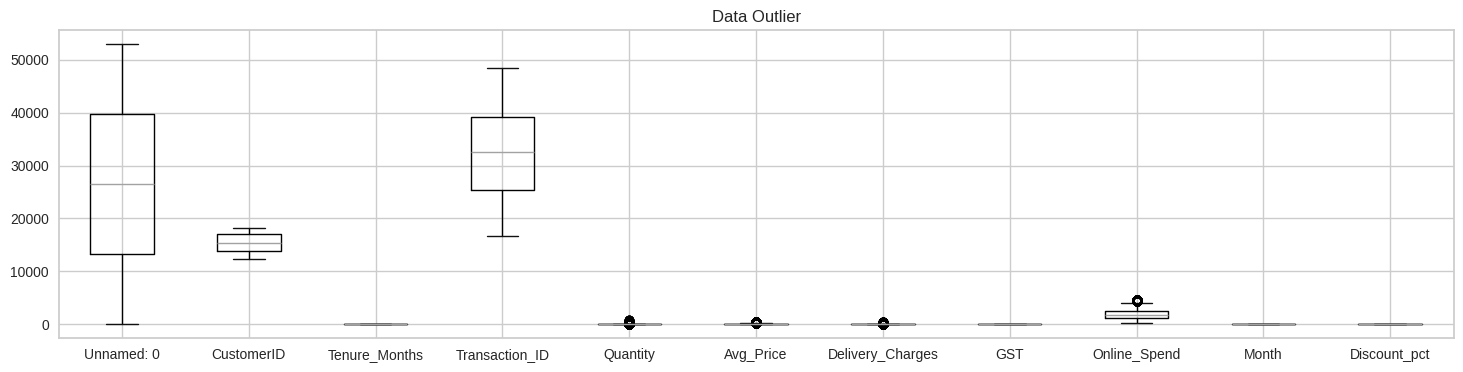

In [50]:
plt.figure(figsize=(18, 4))
df_cl.boxplot()
plt.xticks(rotation=0)
plt.title('Data Outlier')
plt.show()

In [51]:
# Hitung outlier menggunakan IQR
outlier_counts = {}
for col in df_cl.select_dtypes(include=np.number):
    Q1 = df_cl[col].quantile(0.25)
    Q3 = df_cl[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_cl[(df_cl[col] < lower_bound) | (df_cl[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

# Total outlier pada fitur
total_outliers = sum(outlier_counts.values())
print(f"Total Outlier: {total_outliers}\n")

# outlier
for col, count in outlier_counts.items():
    print(f"Outliers pada kolom '{col}': {count}")

Total Outlier: 19520

Outliers pada kolom 'Unnamed: 0': 0
Outliers pada kolom 'CustomerID': 0
Outliers pada kolom 'Tenure_Months': 0
Outliers pada kolom 'Transaction_ID': 0
Outliers pada kolom 'Quantity': 8284
Outliers pada kolom 'Avg_Price': 728
Outliers pada kolom 'Delivery_Charges': 10243
Outliers pada kolom 'GST': 0
Outliers pada kolom 'Online_Spend': 265
Outliers pada kolom 'Month': 0
Outliers pada kolom 'Discount_pct': 0


> Pada tahap ini, kami tidak melakukan penanganan terhadap outlier, karena sudah merepresentasikan karakteristik data aslinya.

### 3.1.4. Check Anomaly Data

In [52]:
df_cl.dtypes

,0
Unnamed: 0,int64
CustomerID,float64
Gender,object
Location,object
Tenure_Months,float64
Transaction_ID,float64
Transaction_Date,object
Product_SKU,object
Product_Description,object
Product_Category,object


In [53]:
numerical_cols = ['Tenure_Months', 'Quantity', 'Avg_Price', 'Delivery_Charges', 'GST', 'Online_Spend', 'Discount_pct']

negative_found = False
for col in numerical_cols:
    negative_values = df_cl[df_cl[col] < 0]
    if not negative_values.empty:
        negative_found = True
        print(f"Terdapat negative value pada kolom'{col}':")
        print(negative_values[[col]])
        print("-" * 20)

if not negative_found:
    print("Tidak ada nilai negatif dalam kolom numerik.")

Tidak ada nilai negatif dalam kolom numerik.


> Tidak ada nilai yang negatif pada kolom yang bertipe numerik

## 3.2. Data Transformation

In [54]:
df_cl.columns = df_cl.columns.str.lower()
df_cl.sample(1)

,unnamed: 0,customerid,gender,location,tenure_months,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,gst,date,online_spend,month,coupon_code,discount_pct
47367,47367,15039.0,F,Chicago,19.0,33011.0,7/18/2019,GGOEGHGR019499,Google Sunglasses,Lifestyle,4.0,2.8,19.99,Not Used,0.18,7/18/2019,2408.61,7,EXTRA10,10.0


In [55]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52924 entries, 0 to 52923
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unnamed: 0           52924 non-null  int64  
 1   customerid           52924 non-null  float64
 2   gender               52924 non-null  object 
 3   location             52924 non-null  object 
 4   tenure_months        52924 non-null  float64
 5   transaction_id       52924 non-null  float64
 6   transaction_date     52924 non-null  object 
 7   product_sku          52924 non-null  object 
 8   product_description  52924 non-null  object 
 9   product_category     52924 non-null  object 
 10  quantity             52924 non-null  float64
 11  avg_price            52924 non-null  float64
 12  delivery_charges     52924 non-null  float64
 13  coupon_status        52924 non-null  object 
 14  gst                  52924 non-null  float64
 15  date                 52924 non-null  obje

> Terdapat fitur-fitur yang belum sesuai dengan tipe datanya seperti `customerid` dan `transaction_date.

In [56]:
# Ganti tipe data
df_cl['customerid'] = df_cl['customerid'].astype(str)
df_cl['transaction_id'] = df_cl['transaction_id'].astype(str)

for col in ['date', 'transaction_date']:
    df_cl[col] = pd.to_datetime(df_cl[col], errors='coerce')

df_cl['quantity'] = df_cl['quantity'].astype('Int64')

In [57]:
df_cl.info()
df_cl.sample(1)

<class 'pandas.core.frame.DataFrame'>
Index: 52924 entries, 0 to 52923
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   unnamed: 0           52924 non-null  int64         
 1   customerid           52924 non-null  object        
 2   gender               52924 non-null  object        
 3   location             52924 non-null  object        
 4   tenure_months        52924 non-null  float64       
 5   transaction_id       52924 non-null  object        
 6   transaction_date     52924 non-null  datetime64[ns]
 7   product_sku          52924 non-null  object        
 8   product_description  52924 non-null  object        
 9   product_category     52924 non-null  object        
 10  quantity             52924 non-null  Int64         
 11  avg_price            52924 non-null  float64       
 12  delivery_charges     52924 non-null  float64       
 13  coupon_status        52924 non-null 

,unnamed: 0,customerid,gender,location,tenure_months,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,gst,date,online_spend,month,coupon_code,discount_pct
23694,23694,16746.0,M,New York,16.0,37387.0,2019-09-05,GGOEGOXQ016399,Badge Holder,Office,1,1.99,6.0,Not Used,0.1,2019-09-05,1201.09,9,OFF30,30.0


## 3.3. Data Filtering

In [58]:
df_fil = df_cl.copy()

In [59]:
df_fil = df_fil.drop(columns=['unnamed: 0', 'date'])

In [60]:
# Reorder kolom (transformasi kolom)
customer_cols = ['customerid', 'gender', 'location', 'tenure_months']
transaction_cols = ['transaction_id', 'transaction_date', 'product_sku', 'product_description',
                   'product_category', 'quantity', 'avg_price', 'delivery_charges',
                   'coupon_status', 'gst', 'offline_spend', 'online_spend', 'month',
                   'coupon_code', 'discount_pct']


present_cols = [col for col in customer_cols + transaction_cols if col in df_fil.columns]
df_fil = df_fil[present_cols]
df_fil.head()

,customerid,gender,location,tenure_months,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,gst,online_spend,month,coupon_code,discount_pct
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,2424.5,1,ELEC10,10.0
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,2424.5,1,ELEC10,10.0
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,0.1,2424.5,1,ELEC10,10.0
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,0.1,2424.5,1,ELEC10,10.0
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,0.1,2424.5,1,ELEC10,10.0


# 4. Feature Engineering

Tahap selanjutnya yaitu melakukan transformasi menjadi variabel baru yaitu RFM. RFM (Recency, Frequency, Monetary) adalah metode segmentasi pelanggan berdasarkan tiga metrik utama:
- `Recency` mengukur seberapa baru pelanggan melakukan transaksi terakhir, mencerminkan keterlibatan terkini.
- `Frequency` menghitung seberapa sering pelanggan bertransaksi dalam periode tertentu, menunjukkan loyalitas pelanggan.
- `Monetary` merepresentasikan total nilai uang yang dihabiskan pelanggan, menggambarkan kontribusi finansial mereka.

Dengan menggunakan ketiga metrik ini, RFM membantu mengidentifikasi pelanggan bernilai tinggi, memahami perilaku pelanggan, dan mengarahkan strategi pemasaran yang lebih efektif.

In [61]:
df_rfm = df_fil.copy()

In [62]:
# tanggal max dataset
max_transaction_date = df_rfm['transaction_date'].max()

# max transaction date tiap customer
rfmTable = df_rfm.groupby('customerid')['transaction_date'].max().reset_index()
rfmTable.columns = ['customerid', 'max_purchase_date']
rfmTable.head()

,customerid,max_purchase_date
0,12346.0,2019-09-15
1,12347.0,2019-11-02
2,12348.0,2019-10-19
3,12350.0,2019-12-14
4,12356.0,2019-09-15


## 4.1. Recency

In [63]:
rfmTable['recency'] = (max_transaction_date - rfmTable['max_purchase_date']).dt.days
rfmTable.head()

,customerid,max_purchase_date,recency
0,12346.0,2019-09-15,107
1,12347.0,2019-11-02,59
2,12348.0,2019-10-19,73
3,12350.0,2019-12-14,17
4,12356.0,2019-09-15,107


## 4.2. Frequency

In [64]:
#  Frequency
rfmTable['frequency'] = df_rfm.groupby('customerid')['transaction_id'].count().values
rfmTable.head()

,customerid,max_purchase_date,recency,frequency
0,12346.0,2019-09-15,107,2
1,12347.0,2019-11-02,59,60
2,12348.0,2019-10-19,73,23
3,12350.0,2019-12-14,17,17
4,12356.0,2019-09-15,107,36


## 4.3. Monetary

In [65]:
df_rfm['monetary'] = (
    (df_rfm['quantity'] * df_rfm['avg_price']) * (1 - df_rfm['discount_pct'] / 100)  # Harga setelah diskon
    + df_rfm['gst']  # Pajak GST
    + df_rfm['delivery_charges']  # Ongkos kirim
)

# Agregasi Monetary per customer
rfmTable['monetary'] = df_rfm.groupby('customerid')['monetary'].sum().values
rfmTable[['customerid','recency', 'frequency', 'monetary']].head()

,customerid,recency,frequency,monetary
0,12346.0,107,2,171.973
1,12347.0,59,60,10625.939
2,12348.0,73,23,1343.072
3,12350.0,17,17,1082.089
4,12356.0,107,36,1652.559


In [66]:
# Recency
rfmTable = df_rfm.groupby('customerid')['transaction_date'].max().reset_index()
rfmTable.columns = ['customerid', 'max_purchase_date']
rfmTable['recency'] = (max_transaction_date - rfmTable['max_purchase_date']).dt.days

# Frequency
rfmTable['frequency'] = df_rfm.groupby('customerid')['transaction_id'].count().values

# Monetary
df_rfm['monetary'] = (
    (df_rfm['quantity'] * df_rfm['avg_price']) * (1 - df_rfm['discount_pct'] / 100)  # Harga setelah diskon
    + df_rfm['gst']  # Pajak GST
    + df_rfm['delivery_charges']  # Ongkos kirim
)
rfmTable['monetary'] = df_rfm.groupby('customerid')['monetary'].sum().values

rfmTable[['customerid','recency', 'frequency', 'monetary']].head()

,customerid,recency,frequency,monetary
0,12346.0,107,2,171.973
1,12347.0,59,60,10625.939
2,12348.0,73,23,1343.072
3,12350.0,17,17,1082.089
4,12356.0,107,36,1652.559


In [67]:
df_merged = pd.merge(df_fil, rfmTable, on='customerid', how='left')
df_merged.sample(1)

,customerid,gender,location,tenure_months,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,gst,online_spend,month,coupon_code,discount_pct,max_purchase_date,recency,frequency,monetary
2080,14775.0,F,Chicago,25.0,19088.0,2019-01-29,GGOEGFKQ020799,Google Doodle Decal,Office,2,3.08,6.5,Clicked,0.1,836.13,1,OFF10,10.0,2019-01-29,336,20,1444.356


# 5. Modeling

In [68]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import RobustScaler

In [69]:
df_model = df_merged.copy()

## 5.1. Standarisasi

Sebelum implementasi model, data dilakukan standarisasi terlebih dahulu untuk menyamakan skala antar fitur.
Metode standarisasi yang digunakan adalah Robust Scaler, karena mampu mengurangi pengaruh outlier dengan menggunakan median dan interkuartil range (IQR).

In [70]:
# standarisasi data
features = ["recency", "frequency", "monetary"]

model_robust = RobustScaler()
model_robust = model_robust.fit_transform(df_model[features])

In [71]:
print(pd.DataFrame(model_robust).describe())

                  0             1             2
count  52924.000000  52924.000000  52924.000000
mean       0.166928      0.527365      0.585520
std        0.683020      1.601668      1.897338
min       -0.652482     -0.729412     -0.724332
25%       -0.425532     -0.352941     -0.377789
50%        0.000000      0.000000      0.000000
75%        0.574468      0.647059      0.622211
max        1.929078      7.435294      9.440612


## 5.2. Reduksi Dimensi (PCA)



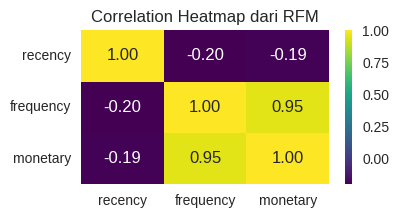

In [72]:
plt.figure(figsize=(4, 2))
sns.heatmap(rfmTable[['recency', 'frequency', 'monetary']].corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap dari RFM')
plt.show()

Dilakukan untuk mereduksi dimensi data, karena pada case ini kolom frequency dan monetary memiliki korelasi yang sangat tinggi.

In [73]:
from sklearn.decomposition import PCA

# PCA dengan 2 komponen
pca = PCA(n_components=2)
X_pca = pca.fit_transform(model_robust)
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

explained_variance = pca.explained_variance_ratio_
variance_df = pd.DataFrame(explained_variance, columns=['Variance'], index=[f'PC{i+1}' for i in range(len(explained_variance))])
variance_df

,Variance
PC1,0.922786
PC2,0.065173


PC1 menjelaskan 92.28% dari total variansi data, yang menunjukkan bahwa hampir seluruh informasi penting terkandung dalam komponen pertama. Sementara itu, PC2 hanya menjelaskan 6.52% dari variansi, menandakan bahwa kontribusinya terhadap variasi data relatif kecil. Dengan demikian, PC1 sudah cukup mewakili data secara keseluruhan.

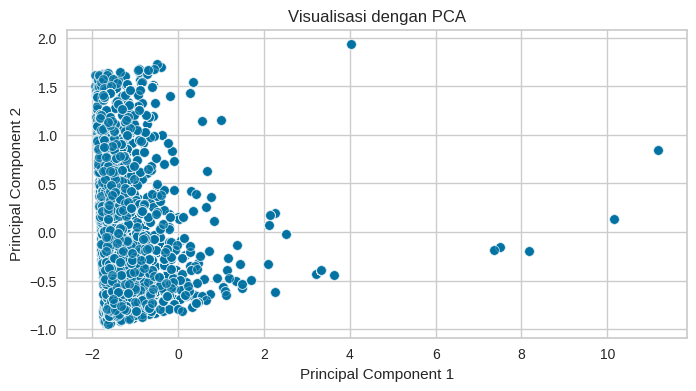

In [74]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualisasi dengan PCA')
plt.grid(True)
plt.show()

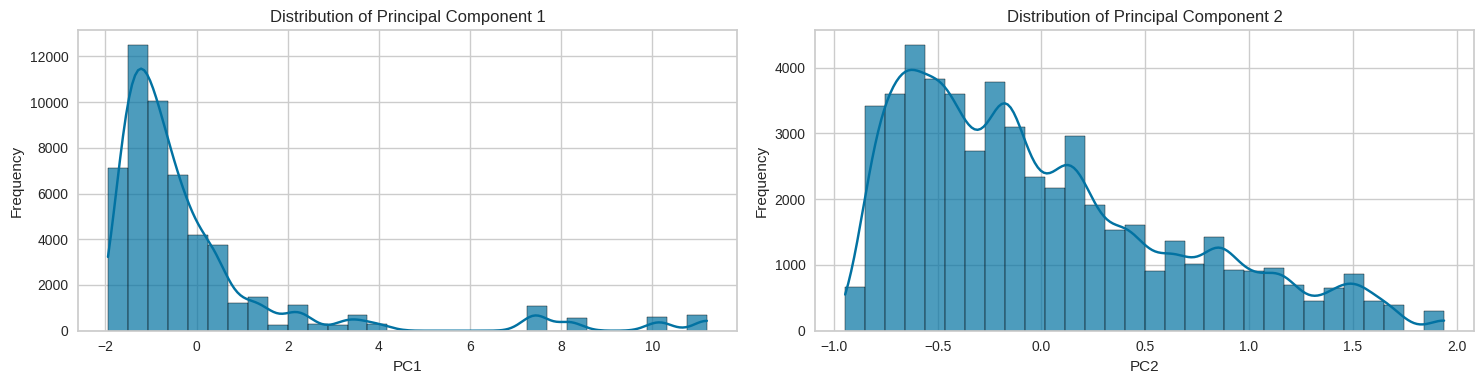

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

pcs = ['PC1', 'PC2']
titles = ['Distribution of Principal Component 1', 'Distribution of Principal Component 2']

for i, pc in enumerate(pcs):
    sns.histplot(df_pca[pc], bins=30, kde=True, alpha=0.7, ax=axes[i])
    axes[i].set_xlabel(f'{pc}')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(titles[i])
    axes[i].grid(True)

plt.tight_layout()
plt.show()

Distribusi PC1 cenderung terpusat di sekitar nilai -1 hingga 1, menunjukkan sebagian besar data berada dalam rentang tersebut.  Distribusi PC2 juga cenderung terpusat di sekitar 0, dengan sedikit penyebaran ke nilai positif dan negatif.  PC1 menjelaskan sebagian besar variansi data (92.28%), sementara PC2 menjelaskan proporsi variansi yang lebih kecil (6.52%).


## 5.3. Implementasi Model

Implementasi model ini menggunakana model KMeans Clustering dengan evaluasi metrik Sum of Squared Errors (SSE) yang dihasilkan melalui Elbow Method. SSE mengukur jarak total antara setiap data dengan centroid klasternya.

KMeans menggunakan **k-means++** untuk memastikan pemilihan centroid awal yang optimal, sedangkan n_init=10 berarti algoritma dijalankan 10 kali agar hasil clustering lebih stabil.

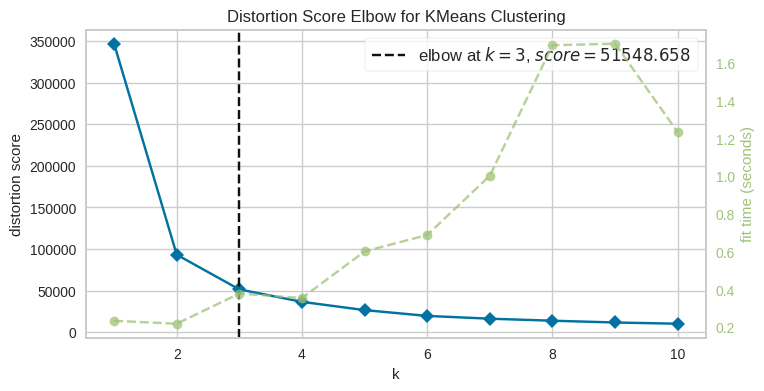

Nilai K optimal:  3

Nilai SSE tiap k:
k=1, SSE=346745.75
k=2, SSE=93285.3
k=3, SSE=51548.66
k=4, SSE=36618.17
k=5, SSE=26700.54
k=6, SSE=19721.1
k=7, SSE=16377.6
k=8, SSE=13953.32
k=9, SSE=11813.23
k=10, SSE=10338.21


In [76]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

plt.figure(figsize=(8, 4))
model = KMeans(init='k-means++', n_init=10, random_state=0)
visualizer = KElbowVisualizer(model, k=(1, 11), timing=True)
visualizer.fit(df_pca)
visualizer.show()

# Metrik SSE
print("Nilai K optimal: ", round(visualizer.elbow_value_, 2))
print("\nNilai SSE tiap k:")
for k, sse in zip(range(1, 12), visualizer.k_scores_):
    print(f"k={k}, SSE={round(sse, 2)}")

## 5.4. Fitting Model

In [77]:
kmeans = KMeans(n_clusters=3, init='k-means++', n_init = 10, random_state=0)
kmeans.fit(df_pca)
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_pca))

In [78]:
centroid_df

,PC1,PC2
0,1.129797,-0.213626
1,9.003094,0.125438
2,-1.026853,0.054023


Centroid yang diberikan menunjukkan titik rata-rata untuk masing-masing klaster pada dua komponen utama PCA (PC1 dan PC2). Setiap baris mewakili posisi pusat dari klaster dalam ruang dua dimensi, di mana klaster 0 berada di (1.13, -0.21), klaster 1 di (9.00, 0.13), dan klaster 2 di (-1.03, 0.05). Titik-titik centroid ini menggambarkan lokasi rata-rata data dalam klaster dan dapat digunakan untuk memvisualisasikan pembagian klaster secara lebih jelas.

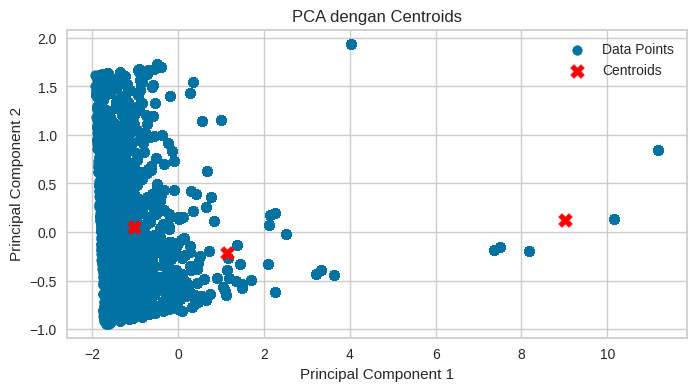

In [79]:
# PCA dengan centroid
plt.figure(figsize=(8, 4))
plt.scatter(df_pca['PC1'], df_pca['PC2'], label='Data Points')

plt.scatter([1.129797, 9.003094, -1.026853], [-0.213626, 0.125438, 0.054023],
            color='red', marker='X', s=100, label='Centroids')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA dengan Centroids')
plt.legend()
plt.show()

## 5.5. Evaluasi Model

**Berdasarkan hasil SSE (Sum of Squared Errors)** yang terus menurun dengan bertambahnya jumlah klaster, terlihat adanya penurunan tajam pada SSE dari klaster 1 hingga klaster 3. Setelah itu, penurunan SSE mulai melambat, menunjukkan adanya "elbow point" yang dapat digunakan untuk menentukan jumlah klaster optimal.

**Untuk memastikan pemilihan jumlah klaster yang optimal, dihitung persentase penurunan SSE** dari satu klaster ke klaster berikutnya:


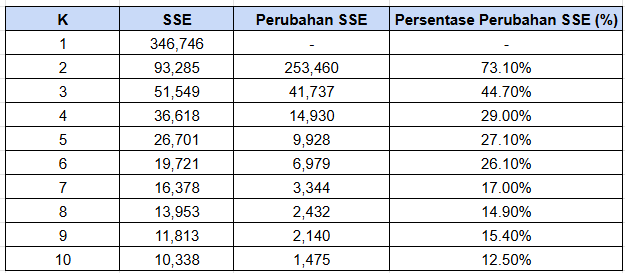

Berdasarkan perhitungan SSE, penurunan nilai SSE sangat besar pada transisi dari cluster 1 ke 2 (73,1%) dan dari cluster 2 ke 3 (44,7%). Setelah itu, penurunan dari cluster 3 ke 4 masih cukup signifikan (29%), namun setelah cluster 4 penurunannya menjadi kecil dan lebih konsisten (sekitar 27% atau kurang).

Meskipun penurunan dari cluster 2 ke 3 cukup besar, memilih 3 cluster lebih optimal. Dengan 3 cluster, kita mendapatkan segmentasi pelanggan yang sudah cukup terperinci dan mudah dipahami, dengan penurunan SSE yang masih signifikan dari cluster 2 ke 3. Penambahan cluster setelah 3 tidak memberikan manfaat yang sebanding, karena penurunan SSE semakin kecil dan melambat.

Oleh karena itu, **cluster 3 adalah pilihan optimal** untuk segmentasi pelanggan karena memberikan keseimbangan antara pengurangan SSE dan kejelasan dalam pembagian kelompok pelanggan.

In [80]:
# Silhouette Score
silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5170442652907203


Dari hasil evaluasi model menggunakan Silhoutte Score juga menunjukkan bahwa struktur cluster yang terbentuk sudah cukup baik dan terpisah dengan jelas antar kelompok.

## 5.6. Labeling Result Model

In [81]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')
df_kmeans = df_model.copy()
df_kmeans['labels'] = df_labels['labels'].values

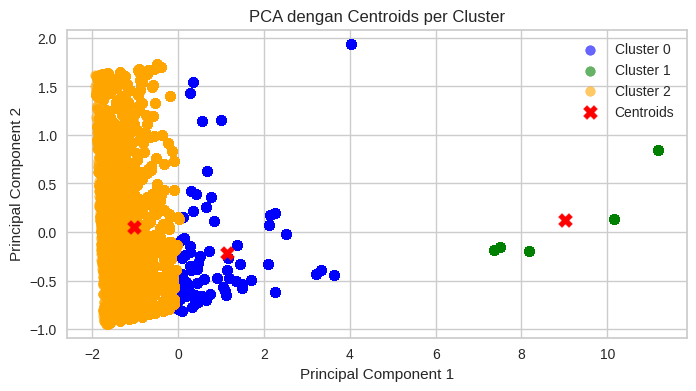

In [82]:
# Warna untuk setiap cluster
colors = ['blue', 'green', 'orange']
labels_map = {
    0: 'Cluster 0',
    1: 'Cluster 1',
    2: 'Cluster 2'
}

# Plot data tiap cluster dengan warna berbeda
plt.figure(figsize=(8, 4))
for i in range(3):
    cluster_data = df_pca[df_kmeans['labels'] == i]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'],
                color=colors[i], label=labels_map[i], alpha=0.6)

# Plot centroid
centroid_pc1 = [1.129797, 9.003094, -1.026853]
centroid_pc2 = [-0.213626, 0.125438, 0.054023]
plt.scatter(centroid_pc1, centroid_pc2,
            color='red', marker='X', s=100, label='Centroids')

# Label dan tampilan
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA dengan Centroids per Cluster')
plt.legend()
plt.show()

In [83]:
df_kmeans.head()

,customerid,gender,location,tenure_months,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,gst,online_spend,month,coupon_code,discount_pct,max_purchase_date,recency,frequency,monetary,labels
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,2424.5,1,ELEC10,10.0,2019-01-26,339,297,34312.608,0
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,2424.5,1,ELEC10,10.0,2019-01-26,339,297,34312.608,0
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,0.1,2424.5,1,ELEC10,10.0,2019-01-26,339,297,34312.608,0
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,0.1,2424.5,1,ELEC10,10.0,2019-01-26,339,297,34312.608,0
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,0.1,2424.5,1,ELEC10,10.0,2019-01-26,339,297,34312.608,0


## 5.7. Analisis Statistik by Cluster

In [84]:
df_kmeans.groupby('labels')[['recency', 'frequency', 'monetary']].mean().reset_index()

,labels,recency,frequency,monetary
0,0,73.841761,176.389364,14602.675706
1,1,32.643293,595.844173,57646.027513
2,2,134.313672,49.983533,3863.16609


**Analisis Berdasarkan Rata-Rata Cluster:**

**Cluster 0:**
- Recency (73.84) menunjukkan bahwa pelanggan ini baru saja berinteraksi dengan bisnis dalam rentang waktu yang cukup lama, namun masih relatif aktif.
- Frequency (176.39) dan Monetary (14602.68) menunjukkan tingkat pembelian yang sedang hingga tinggi, dengan pengeluaran rata-rata lebih rendah dibandingkan Cluster 1, namun masih signifikan.

**Cluster 1:**
- Recency (32.64) menunjukkan bahwa pelanggan ini cukup baru atau masih aktif berinteraksi dalam waktu dekat, menunjukkan tingkat keterlibatan yang baik.
- Frequency (595.84) dan Monetary (57646.03) jauh lebih tinggi dibandingkan dengan Cluster lainnya, menunjukkan bahwa Cluster ini terdiri dari pelanggan dengan frekuensi pembelian tinggi dan pengeluaran rata-rata sangat tinggi. Ini bisa jadi menunjukkan pelanggan VIP atau premium.

**Cluster 2:**
- Recency (134.31) menunjukkan bahwa pelanggan di Cluster ini telah lama tidak berinteraksi atau membeli produk, yang berarti pelanggan di Cluster ini cenderung kurang aktif atau sudah lama berhenti bertransaksi.
- Frequency (49.98) dan Monetary (3863.17) jauh lebih rendah dibandingkan dengan Cluster lainnya, yang menunjukkan bahwa meskipun pelanggan ini jarang bertransaksi, mereka memiliki potensi untuk dikembangkan lebih lanjut melalui strategi pemasaran yang tepat.


**Kesimpulan:**
- **High-Value Customers (Cluster 1)** adalah segmen pelanggan dengan pengeluaran dan frekuensi pembelian tertinggi, yang bisa dianggap sebagai pelanggan utama.
- **Loyal Customers (Cluster 0**) menunjukkan pelanggan dengan tingkat keterlibatan yang sedang, yang bisa menjadi target untuk upaya pemasaran guna meningkatkan frekuensi pembelian.
- **Dormant Customers (Cluster 2)** adalah segmen pelanggan yang kurang aktif dengan pengeluaran rendah, yang memerlukan strategi pemulihan atau promosi untuk meningkatkan keterlibatan mereka kembali.

Nama segmen ini bertujuan untuk memberikan pemahaman yang lebih jelas tentang karakteristik masing-masing kelompok pelanggan, sehingga strategi pemasaran dan pendekatan yang lebih efektif dapat diterapkan untuk setiap segmen.










In [85]:
df_kmeans['cluster_name'] = df_kmeans['labels'].map({
    0: 'Loyal',      # Label 0 sebagai Loyal Customers
    1: 'High-Value', # Label 1 sebagai High-Value Customers
    2: 'Dormant'     # Label 2 sebagai Dormant Customers
})

df_kmeans.head()

,customerid,gender,location,tenure_months,transaction_id,transaction_date,product_sku,product_description,product_category,quantity,avg_price,delivery_charges,coupon_status,gst,online_spend,month,coupon_code,discount_pct,max_purchase_date,recency,frequency,monetary,labels,cluster_name
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,2424.5,1,ELEC10,10.0,2019-01-26,339,297,34312.608,0,Loyal
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,0.1,2424.5,1,ELEC10,10.0,2019-01-26,339,297,34312.608,0,Loyal
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.5,Not Used,0.1,2424.5,1,ELEC10,10.0,2019-01-26,339,297,34312.608,0,Loyal
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1,81.50,6.5,Clicked,0.1,2424.5,1,ELEC10,10.0,2019-01-26,339,297,34312.608,0,Loyal
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Clicked,0.1,2424.5,1,ELEC10,10.0,2019-01-26,339,297,34312.608,0,Loyal


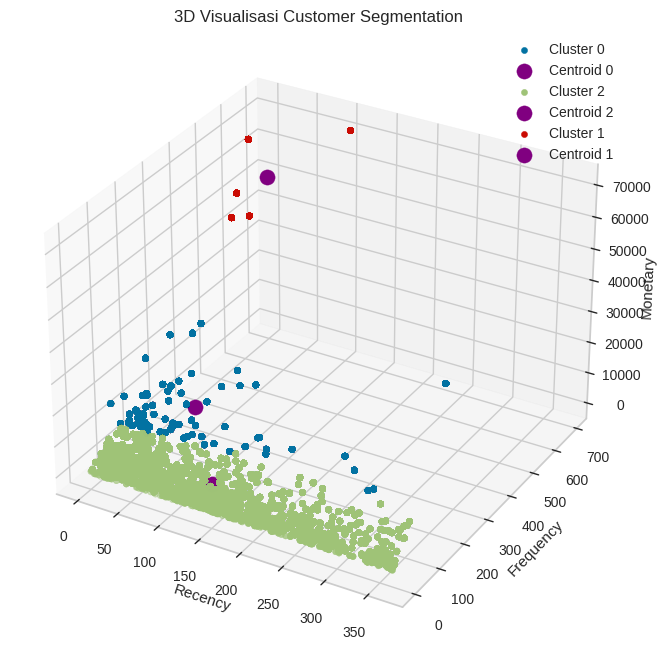

In [86]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label in df_kmeans['labels'].unique():
    cluster_data = df_kmeans[df_kmeans['labels'] == label]
    ax.scatter(cluster_data['recency'], cluster_data['frequency'], cluster_data['monetary'], label=f'Cluster {label}')

    # centroid  di tiap cluster
    centroid = cluster_data[['recency', 'frequency', 'monetary']].mean()
    ax.scatter(centroid['recency'], centroid['frequency'], centroid['monetary'], s=120, c='purple', label=f'Centroid {label}')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Visualisasi Customer Segmentation')
ax.legend()
plt.show()

> Dari hasil visualisasi 3D ini, terlihat jelas pemisahan tiap-tiap data poin dari setiap RFM dan cluster.

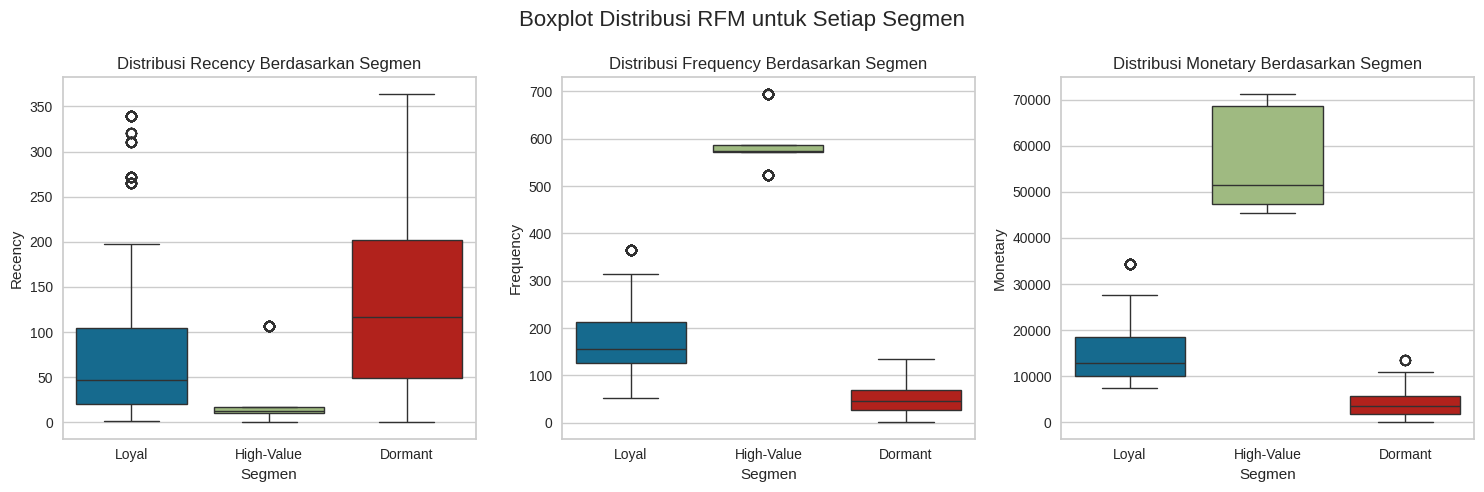

In [87]:
# Distribusi RFM berdasarkan Cluster
# subplot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Boxplot Distribusi RFM untuk Setiap Segmen', fontsize=16)

# rfm
for i, variable in enumerate(['recency', 'frequency', 'monetary']):
  sns.boxplot(ax=axes[i], x='cluster_name', y=variable, data=df_kmeans,hue='cluster_name')
  axes[i].set_title(f'Distribusi {variable.capitalize()} Berdasarkan Segmen')
  axes[i].set_xlabel('Segmen')
  axes[i].set_ylabel(variable.capitalize())

plt.tight_layout()
plt.show()

> **Insight:** Boxplot menunjukkan bahwa Cluster 1 memiliki recency yang sangat rendah dengan jumlah pelanggan yang sedikit, menandakan pelanggan aktif dan loyal. Sementara itu, Cluster 2 memiliki recency yang tinggi dengan jumlah pelanggan yang besar, serta frequency dan monetary yang rendah yang menandakan pelanggan tidak aktif dan perlu segera ditangani melalui strategi re-engagement.

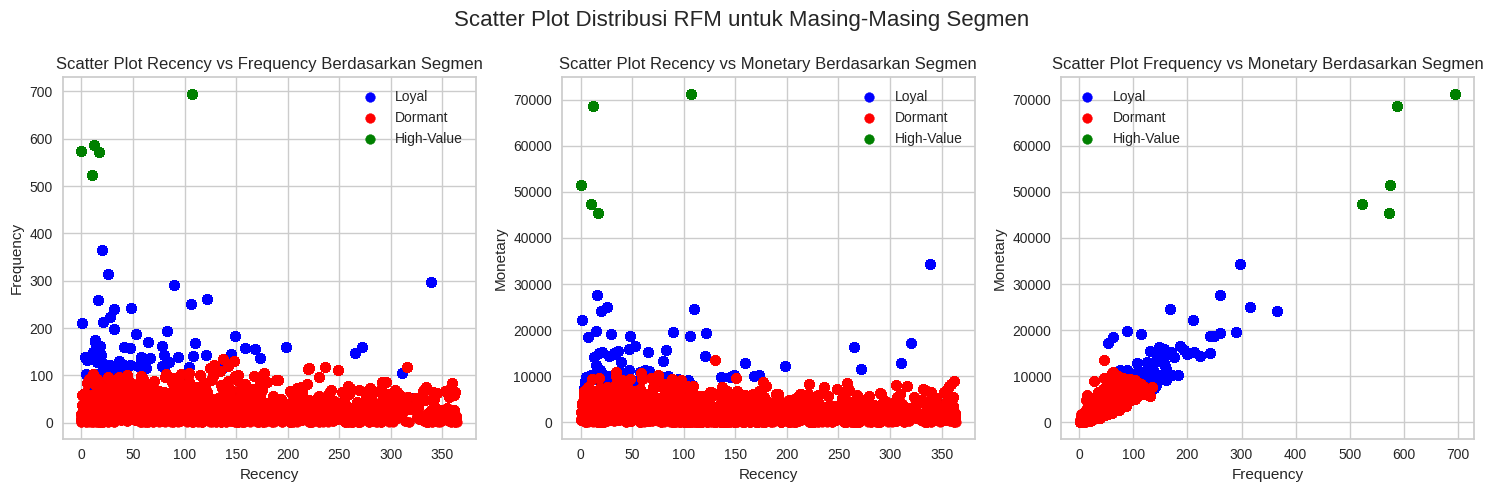

In [88]:
# Distribusi RFM berdasarkan Cluster
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Scatter Plot Distribusi RFM untuk Masing-Masing Segmen', fontsize=16)
pairs = [('recency', 'frequency'), ('recency', 'monetary'), ('frequency', 'monetary')]

color_map = {
    'Dormant': 'red',
    'High-Value': 'green',
    'Loyal': 'blue'
}

for i, (x, y) in enumerate(pairs):
    for label in df_kmeans['cluster_name'].unique():
        cluster_data = df_kmeans[df_kmeans['cluster_name'] == label]
        axes[i].scatter(
            cluster_data[x], cluster_data[y],
            label=label,
            color=color_map.get(label, 'gray')  # default
        )
    axes[i].set_title(f'Scatter Plot {x.capitalize()} vs {y.capitalize()} Berdasarkan Segmen')
    axes[i].set_xlabel(x.capitalize())
    axes[i].set_ylabel(y.capitalize())
    axes[i].legend()

plt.tight_layout()
plt.show()


>**Insight:** Berdasarkan distribusi dengan Scatterplot, didapatkan:
- **Recency vs Monetary:**
    - Data pada Cluster 2 mendominasi pada recency rendah hingga tinggi dengan monetary yang rendah.
    - Data pada Cluster 1 tersebar dari recency rendah ke tinggi (dominasinya
     berkumpul direndah), dengan monetary lebih tinggi dibandingkan cluster 2.
    - Data pada cluster 0 tersebar dengan recency rendah dengan monetary yang tinggi, namun jumlah customernya cenderung sedikit.
- **Recency vs Frequency:**
    - Data pada Cluster 2 mendominasi pada recency rendah hingga tinggi dengan monetary yang rendah.
    - Data pada Cluster 1 tersebar dari recency rendah ke tinggi (dominasinya
     berkumpul direndah), dengan monetary lebih tinggi dibandingkan cluster 2.
    - Data pada cluster 0 tersebar dengan recency rendah dengan monetary yang tinggi, namun jumlah customernya cenderung sedikit
- **Frequency vs Monetary:**
    - Pada cluster 2, data terpusat pada frequency yang rendah dengan monetary yang rendah.
    -  Pada cluster 1, data cukup tersebar pada frequency yang cukup rendah hingga sedang (lebih banyak daripada cluster 2).
    - pada cluster 0, data tersebar pada frequency yang sangat tinggi dengan monetary yang tinggi.

# 6. Analisis Lanjutan Berdasarkan Segmen

## 6.1. Distribusi Customers Berdasarkan Segmen

  cluster  count cluster_name
0       0  11470        Loyal
1       1   2952   High-Value
2       2  38502      Dormant


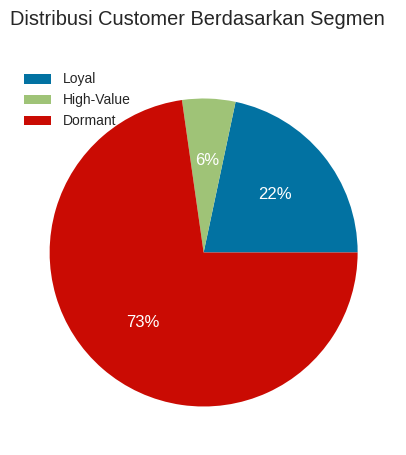

In [89]:
clusters_count = df_kmeans.groupby("labels").agg({"customerid": "count"})
clusters_count.reset_index(inplace=True)
clusters_count.columns = ['cluster', 'count']
clusters_count['cluster_name'] = clusters_count['cluster'].map({
    0: 'Loyal',
    1: 'High-Value',
    2: 'Dormant'
})

print(clusters_count)

fig = plt.figure(figsize=(5, 5))
fig.suptitle('Distribusi Customer Berdasarkan Segmen')

plt.pie(clusters_count["count"],
        labels=clusters_count["cluster_name"],
        autopct='%.0f%%',
        textprops={'color': 'white'})
plt.legend()
plt.show()

> **Insight:** 73% data menunjukkan bahwa dominasi segmen customer dalam masa dormant,yang menunjukkan bahwa sebagian besar pelanggan memiliki keterlibatan rendah, sehingga langkah preventif perlu segera dilakukan

## 6.2. Analisis Gender Berdasarkan Segmen

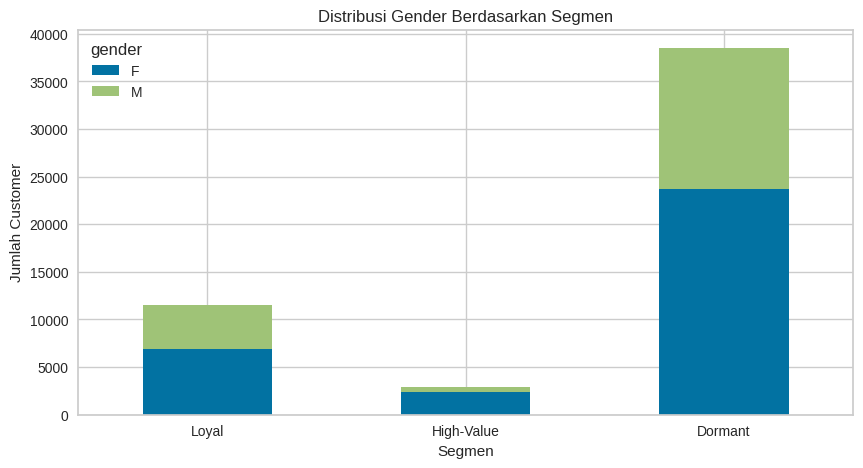

gender            F      M
cluster_name              
Loyal          6932   4538
High-Value     2380    572
Dormant       23695  14807


In [90]:
gender_cluster_analysis = df_kmeans.groupby(['cluster_name', 'gender'])['customerid'].count().unstack()
# viz
gender_cluster_analysis.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Distribusi Gender Berdasarkan Segmen')
plt.xlabel('Segmen')
plt.ylabel('Jumlah Customer')
plt.xticks(rotation=0)
plt.show()

print(gender_cluster_analysis)

> **Insight:** Terlihat bahwa perempuan mendominasi setiap cluster, termasuk Dormant, Loyal, dan High-Value. Hal ini menunjukkan bahwa pelanggan perempuan harus menjadi prioritas, mengingat mereka tidak hanya mendominasi di segmen Dormant, tetapi juga berpotensi besar pada segmen Loyal dan High-Value.

## 6.3. Top 3 Kategori Produk Paling Sering Dibeli Perempuan Berdasarkan Segmen

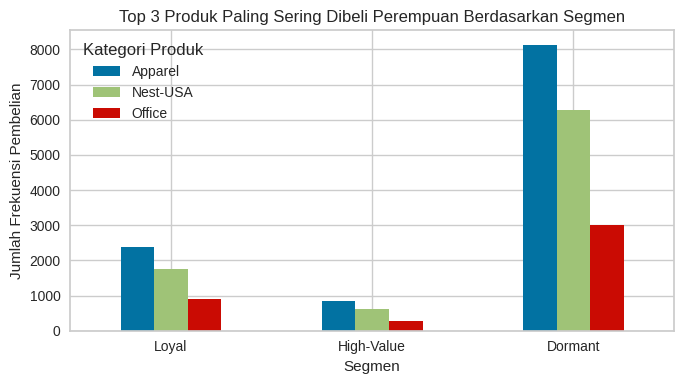

product_category  Apparel  Nest-USA  Office
cluster_name                               
Loyal                2390      1752     902
High-Value            831       618     272
Dormant              8134      6272    3004


In [91]:
catproduct_frequency_by_gender = df_kmeans[df_kmeans['gender'] == 'F'].groupby(['cluster_name', 'product_category']).size().unstack(fill_value=0)

# Top 3 produk
top_3_frequent_catproducts = catproduct_frequency_by_gender.apply(lambda x: x.nlargest(3), axis=1)
top_3_frequent_catproducts.plot(kind='bar', figsize=(7, 4))

plt.title('Top 3 Produk Paling Sering Dibeli Perempuan Berdasarkan Segmen')
plt.xlabel('Segmen')
plt.ylabel('Jumlah Frekuensi Pembelian')
plt.xticks(rotation=0)
plt.legend(title='Kategori Produk')
plt.tight_layout()
plt.show()

print(top_3_frequent_catproducts)

> **Insight:** Baik dari ketiga cluster, produk kategori yang paling dominan dibeli oleh perempuan adalah produk dalam kategori Apparel, Nest-USA, dan Office.

## 6.4. Top 3 Produk Paling Sering Dibeli Perempuan Berdasarkan Segmen

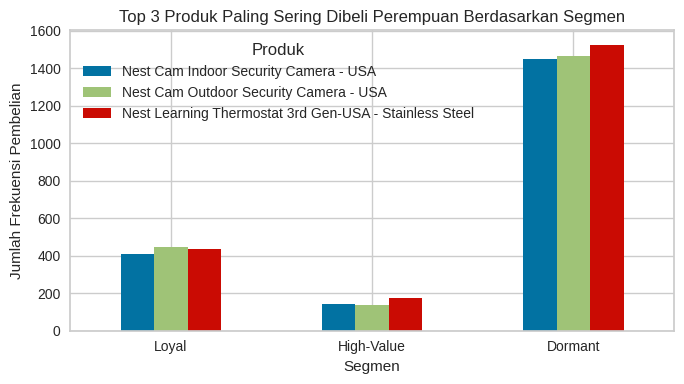

cluster_name                                        Loyal  High-Value  Dormant
product_description                                                           
Nest Cam Indoor Security Camera - USA                 408         141     1450
Nest Cam Outdoor Security Camera - USA                448         139     1466
Nest Learning Thermostat 3rd Gen-USA - Stainles...    435         174     1527


In [92]:
#  Produk yang sering dibeli Perempuan
product_frequency_by_gender = df_kmeans[df_kmeans['gender'] == 'F'].groupby('cluster_name')['product_description'].value_counts().unstack(fill_value=0)

# top 3
top_3_frequent_products = product_frequency_by_gender.apply(lambda x: x.nlargest(3), axis=1)
top_3_frequent_products.plot(kind='bar', figsize=(7, 4))

plt.title('Top 3 Produk Paling Sering Dibeli Perempuan Berdasarkan Segmen')
plt.xlabel('Segmen')
plt.ylabel('Jumlah Frekuensi Pembelian')
plt.xticks(rotation=0)
plt.legend(title='Produk')
plt.tight_layout()
plt.show()

print(top_3_frequent_products.T)

> **Insight:** Berdasarkan temuan, *produk Nest Learning Thermostat 3rd Gen-USA - Stainless Steel menjadi yang paling sering dibeli oleh pelanggan perempuan* di segmen Dormant, diikuti oleh Nest Cam Outdoor Security Camera - USA dan Nest Cam Indoor Security Camera - USA. Sementara itu, di segmen Loyal, produk Nest Cam Outdoor Security Camera - USA lebih dominan.

## 6.5. Distribusi Customer Berdasarkan Lokasi di Setiap Segmen

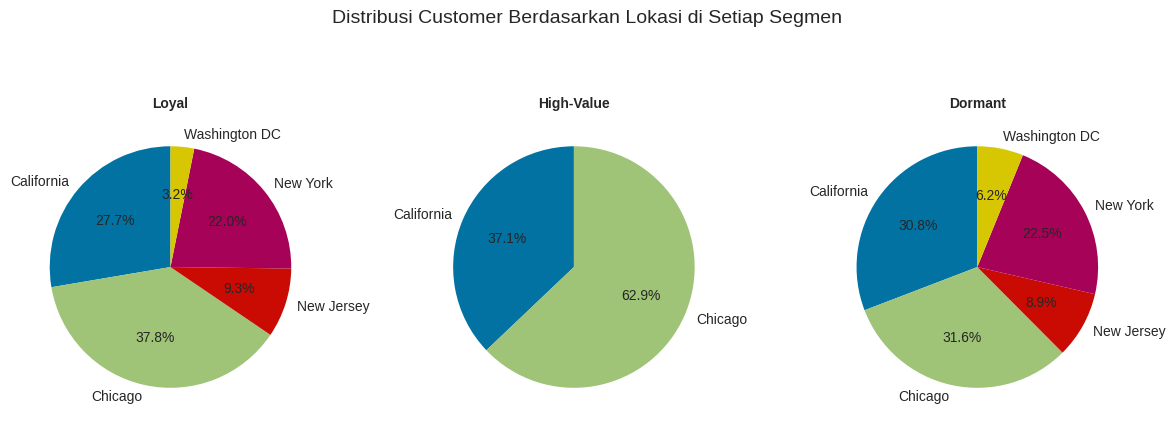

location      California  Chicago  New Jersey  New York  Washington DC
cluster_name                                                          
Loyal               3174     4340        1066      2528            362
High-Value          1095     1857           0         0              0
Dormant            11867    12183        3437      8645           2370


In [93]:
location_cluster_analysis = df_kmeans.groupby(['cluster_name', 'location'])['customerid'].count().unstack()
fig, axs = plt.subplots(1, len(location_cluster_analysis), figsize=(12, 5))

for i, cluster in enumerate(location_cluster_analysis.index):
    # Ambil hanya data yang > 0
    cluster_data = location_cluster_analysis.loc[cluster]
    cluster_data = cluster_data[cluster_data > 0]

    axs[i].pie(
        cluster_data,
        labels=cluster_data.index,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 10},
        labeldistance=1.1
    )
    axs[i].set_title(f'{cluster}', fontsize=10, fontweight='bold')

fig.suptitle('Distribusi Customer Berdasarkan Lokasi di Setiap Segmen', fontsize=14)
plt.tight_layout()
plt.show()

print(location_cluster_analysis)

> **Insight:** Berdasarkan lokasi, menunjukkan bahwa baik segment loyal, high value, dan dormant, kota California dan Chicago mendominasi ditiap cluster.

## 6.6 Distribusi Customer Berdasarkan Kupon di Setiap Segmen

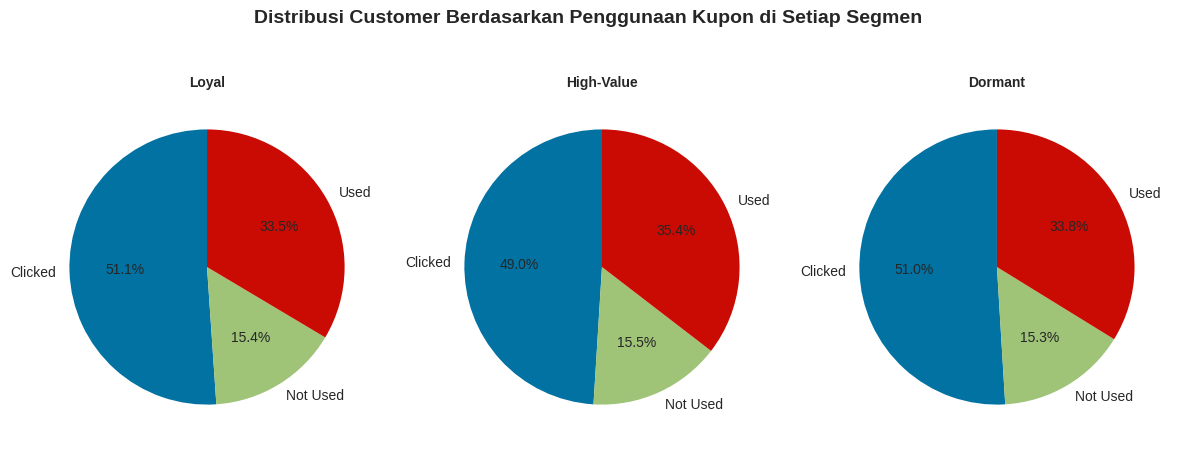

coupon_status  Clicked  Not Used   Used
cluster_name                           
Loyal             5859      1763   3848
High-Value        1447       459   1046
Dormant          19620      5872  13010


In [94]:
coupon_cluster_analysis= df_kmeans.groupby(['cluster_name', 'coupon_status'])['customerid'].count().unstack()
fig, axs = plt.subplots(1, len(coupon_cluster_analysis), figsize=(12, 5))

for i, cluster in enumerate(coupon_cluster_analysis.index):
    cluster_data = coupon_cluster_analysis.loc[cluster]
    cluster_data = cluster_data[cluster_data > 0]  # Hapus yang nol

    axs[i].pie(
        cluster_data,
        labels=cluster_data.index,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 10},
        labeldistance=1.1
    )
    axs[i].set_title(f'{cluster}', fontsize=10, fontweight='bold')

fig.suptitle('Distribusi Customer Berdasarkan Penggunaan Kupon di Setiap Segmen', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(coupon_cluster_analysis)

> **Insight**: Dari semua segmen yang ada, kupon yang diberikan dominasinya adalah kupon tersebut hanya diklik oleh customer, terutama pada cluster Dormant yang menunjukkan bahwa promosi yang ditawarkan kurang menarik.

## 6.7 Distribusi Customer Berdasarkan Pemberian Diskon di Setiap Segmen

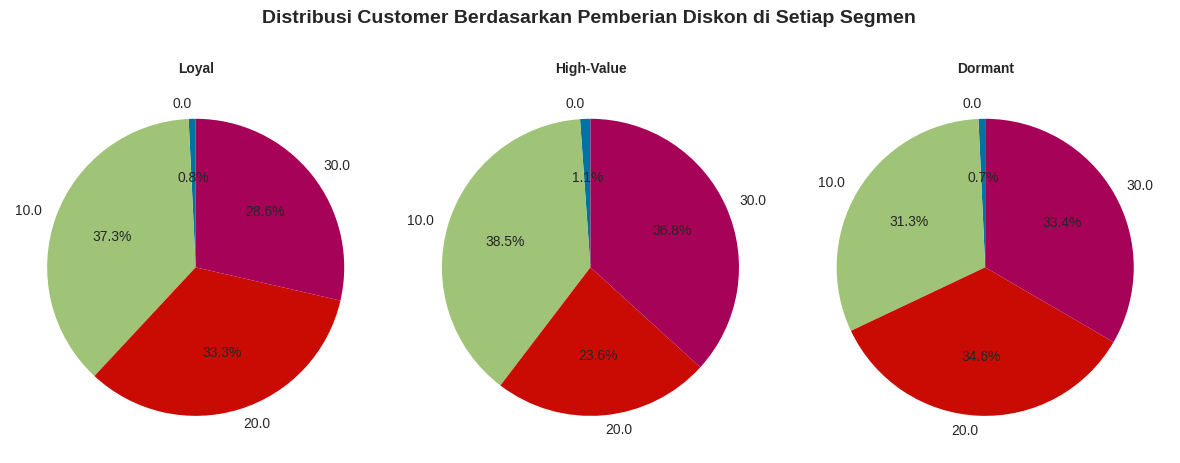

discount_pct  0.0    10.0   20.0   30.0
cluster_name                           
Loyal           87   4279   3824   3280
High-Value      33   1137    697   1085
Dormant        280  12054  13309  12859


In [95]:
discount_cluster_analysis = df_kmeans.groupby(['cluster_name', 'discount_pct'])['customerid'].count().unstack()

fig, axs = plt.subplots(1, len(discount_cluster_analysis), figsize=(12, 5))

for i, cluster in enumerate(discount_cluster_analysis.index):
    cluster_data = discount_cluster_analysis.loc[cluster]
    cluster_data = cluster_data[cluster_data > 0]  # Hapus yang nol

    axs[i].pie(
        cluster_data,
        labels=cluster_data.index,
        autopct='%1.1f%%',
        startangle=90,
        textprops={'fontsize': 10},
        labeldistance=1.1
    )
    axs[i].set_title(f'{cluster}', fontsize=10, fontweight='bold')

fig.suptitle('Distribusi Customer Berdasarkan Pemberian Diskon di Setiap Segmen', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(discount_cluster_analysis)

> **Insight:** Dari data diskon, Segmen Loyal merespons baik diskon 10-20%, High-Value tertarik pada diskon 30% (meski jumlahnya lebih sedikit), sementara Dormant lebih aktif dengan diskon 20-30%

# 7. Kesimpulan

- **Prioritas Reaktivasi Segmen Dormant.** 73% data menunjukkan customer berada di segmen Dormant, yang mencerminkan rendahnya keterlibatan pelanggan. Langkah preventif seperti reaktivasi perlu segera dilakukan untuk meningkatkan keterlibatan customer.
-**Prioritas Pelanggan Perempuan.** Pelanggan perempuan mendominasi semua segmen, termasuk Dormant, Loyal, dan High-Value. Oleh karena itu, strategi pemasaran harus fokus pada perempuan, terutama untuk menarik kembali pelanggan perempuan di segmen Dormant.
- **Pemilihan Produk Dominan untuk Perempuan**, seperti kategori produk Apparel, Nest-USA, dan Office yang paling banyak dibeli oleh perempuan di semua segmen, dengan produk Nest Learning Thermostat 3rd Gen paling dominan di segmen Dormant.
- **California dan Chicago menjadi lokasi yang mendominasi di setiap segmen**, yang menunjukkan bahwa strategi pemasaran dan promosi perlu difokuskan di kedua kota tersebut.
- **Perlunya Peningkatan terhadap Efektivitas Kupon dan Diskon**, karena banyak kupon hanya diklik tanpa digunakan, terutama di segmen Dormant, yang menunjukkan bahwa promosi perlu lebih menarik. Diskon 10-20% efektif untuk Loyal, sementara Dormant lebih responsif terhadap diskon 10-30%, dan High-Value cenderung tertarik pada diskon 30% dan namun promosi non-diskon juga tetap dapat digunakan.

# 8. Rekomendasi

1. **Fokus pada Program Reaktivasi untuk Segmen Dormant**\
Strategi reaktivasi perlu diprioritaskan. Mulailah dengan pendekatan ringan seperti email reminder berbasis histori pembelian, lanjutkan dengan program loyalty re-engagement untuk membangun kembali hubungan, dan akhiri dengan promo khusus yang disesuaikan dengan minat mereka.
2. **Tingkatkan Targeting untuk Pelanggan Perempuan**\
Strategi komunikasi dan visual campaign yang lebih relevan secara emosional dan fungsional dengan kebutuhan perempuan akan lebih efektif dalam menarik perhatian. Campaign berbasis storytelling, penghargaan loyalitas, dan kolaborasi dengan influencer perempuan bisa meningkatkan keterlibatan, khususnya untuk segmen Dormant yang membutuhkan dorongan lebih.
3.**Prioritaskan Produk Apparel, Nest-USA, dan Office untuk Perempuan**\
Untuk segmen Dormant, fokus pada peningkatan awareness melalui promosi produk yang sebelumnya pernah dibeli, seperti Nest Learning Thermostat 3rd Gen. Pada segmen Loyal, dorong pembelian berulang lewat bundling dan penawaran eksklusif. Sementara itu, segmen High-Value dapat diberikan perlakuan premium untuk menjaga persepsi nilai produk dan mendorong loyalitas.
4. **Fokuskan Promosi di Wilayah California dan Chicago**\
Kedua lokasi ini mendominasi pelanggan di semua segmen. Oleh karena itu, disarankan untuk menjalankan campaign berbasis lokasi yang relevan dengan budaya setempat, seperti pop-up events, kolaborasi dengan influencer lokal, atau promosi yang disesuaikan dengan kebutuhan wilayah.
5. **Optimalkan Strategi Diskon Sesuai Respons Segmen**\
Fokuskan diskon utama pada segmen Dormant dengan (10-30%) untuk mendorong reaktivasi. Diskon ini bisa diterapkan secara selektif dan terarah untuk meminimalkan pengeluaran. Untuk segmen Loyal, diskon ringan (10%) sudah cukup untuk mendorong pembelian ulang, sementara untuk segmen High-Value, lebih efektif untuk menawarkan program eksklusif atau insentif non-diskon yang dapat menjaga kualitas hubungan tanpa membebani anggaran.
6. **Tingkatkan Konversi Kupon Digital**\
Rendahnya tingkat penggunaan kupon, khususnya di segmen Dormant, menunjukkan bahwa kupon kurang menggugah untuk digunakan. Perlu evaluasi terhadap desain visual, kejelasan nilai manfaat, penyisipan elemen urgency (seperti batas waktu atau stok terbatas), dan CTA agar kupon dapat lebih efektif dikonversi menjadi transaksi.